# Principal Component Analysis with Cancer Data

In [0]:
#Import all the necessary modules

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
cancer_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Lab/Datasets/breast-cancer-wisconsin-data.csv')

In [0]:
cancer_data.head(8)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2


In [0]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [0]:
# Checking datatypes for each column
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


According to Dataset description all columns must be integer type.
But from above we can see that 'Bare Nuclei' is not int64. Therefore need to check the same.

In [0]:
# descriptive analysis
cancer_data.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [0]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
cancer_data.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

There is no missing value in the data. Let's check 'Bare Nuclei' feature more breifly.

In [0]:
# checking for unique values in hp column
cancer_data['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

We can see there is '?' in the column which is a missing data.

In [0]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
cancer_data[cancer_data['Bare Nuclei'] == "?"]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [0]:
cancer_data[cancer_data['Bare Nuclei'] == "?"].shape  # There are 16 rows 

(16, 11)

In [0]:
# Lets check the mode of the column
cancer_data['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [0]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# First let's replace ? with NAN value
cancer_data['Bare Nuclei'].replace('?', np.NaN, inplace=True)

# converting column type from object to float
cancer_data['Bare Nuclei'] = cancer_data['Bare Nuclei'].astype('float64')

# Now let's check the mean for the same
print("Mode for Bare Nuclei is: ", cancer_data['Bare Nuclei'].mode()[0])

#replace it with the mean
cancer_data['Bare Nuclei'].replace(np.NAN, cancer_data['Bare Nuclei'].mode()[0], inplace=True)

#Since we have replaced all missing values now let's check describe again
cancer_data.describe()

('Mode for Bare Nuclei is: ', 1.0)


,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [0]:
duplicate_cancer_data = cancer_data[cancer_data.duplicated()]
duplicate_cancer_data.shape

(9, 11)

In [0]:
# removing duplicates
pure_cancer_data = cancer_data.drop_duplicates(keep=False,inplace=False)
pure_cancer_data.shape

(681, 11)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [0]:
# Check for correlation of variable
corr = pure_cancer_data.drop('ID', axis=1, inplace=False).corr()
corr

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.641402,0.652590,0.489078,0.512561,0.591328,0.563768,0.535161,0.350354,0.717653
Cell Size,0.641402,1.000000,0.903755,0.720542,0.741953,0.682397,0.763674,0.731454,0.461207,0.817266
Cell Shape,0.652590,0.903755,1.000000,0.698781,0.708565,0.700736,0.741308,0.729812,0.442043,0.816135
Marginal Adhesion,0.489078,0.720542,0.698781,1.000000,0.617348,0.678242,0.673094,0.601059,0.416363,0.705671
Single Epithelial Cell Size,0.512561,0.741953,0.708565,0.617348,1.000000,0.577150,0.625147,0.639145,0.486105,0.679304
Bare Nuclei,0.591328,0.682397,0.700736,0.678242,0.577150,1.000000,0.671267,0.581668,0.343282,0.814279
Normal Nucleoli,0.563768,0.763674,0.741308,0.673094,0.625147,0.671267,1.000000,0.672396,0.343374,0.756864
Bland Chromatin,0.535161,0.731454,0.729812,0.601059,0.639145,0.581668,0.672396,1.000000,0.426625,0.718572
Mitoses,0.350354,0.461207,0.442043,0.416363,0.486105,0.343282,0.343374,0.426625,1.000000,0.424750
Class,0.717653,0.817266,0.816135,0.705671,0.679304,0.814279,0.756864,0.718572,0.424750,1.000000


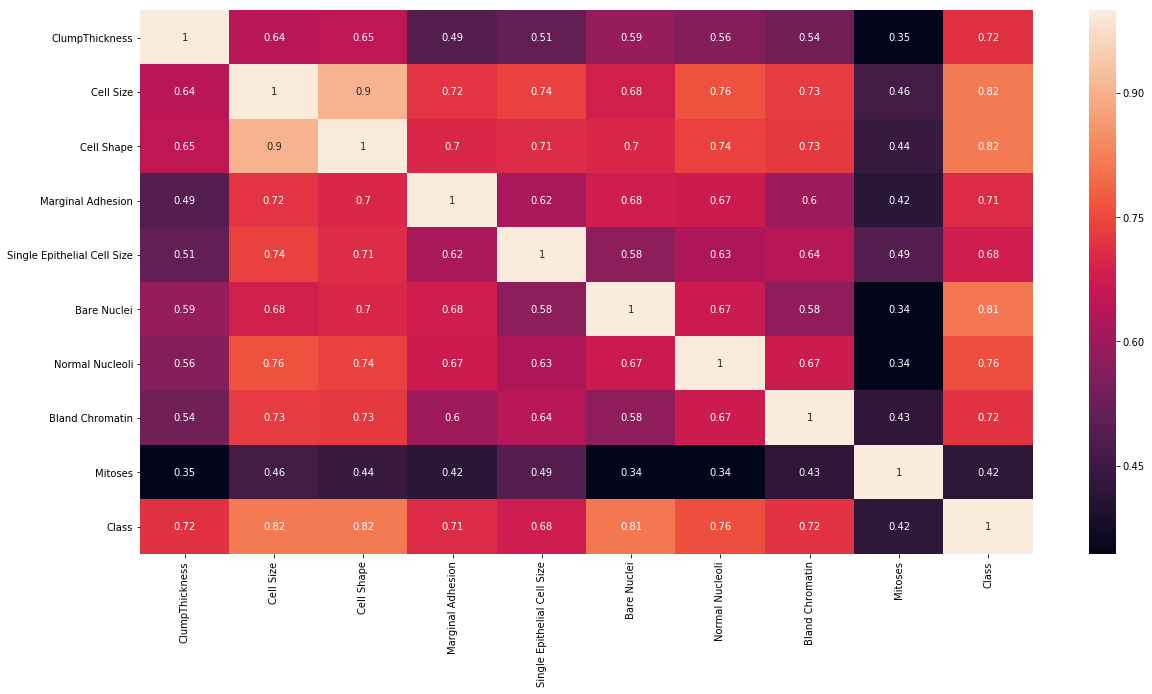

In [0]:
# creatig the heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

Following are the observation from above correlation analysis:
- Mitoses is weakly corelated with all other features and class
- Cell size, cell shape, Marginal Adhesion, Bare Nuclei, Normal Nucleoli, bland chromatin are more than or approximately 70% correlated.
- Mitoses can't be used for PCA

In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

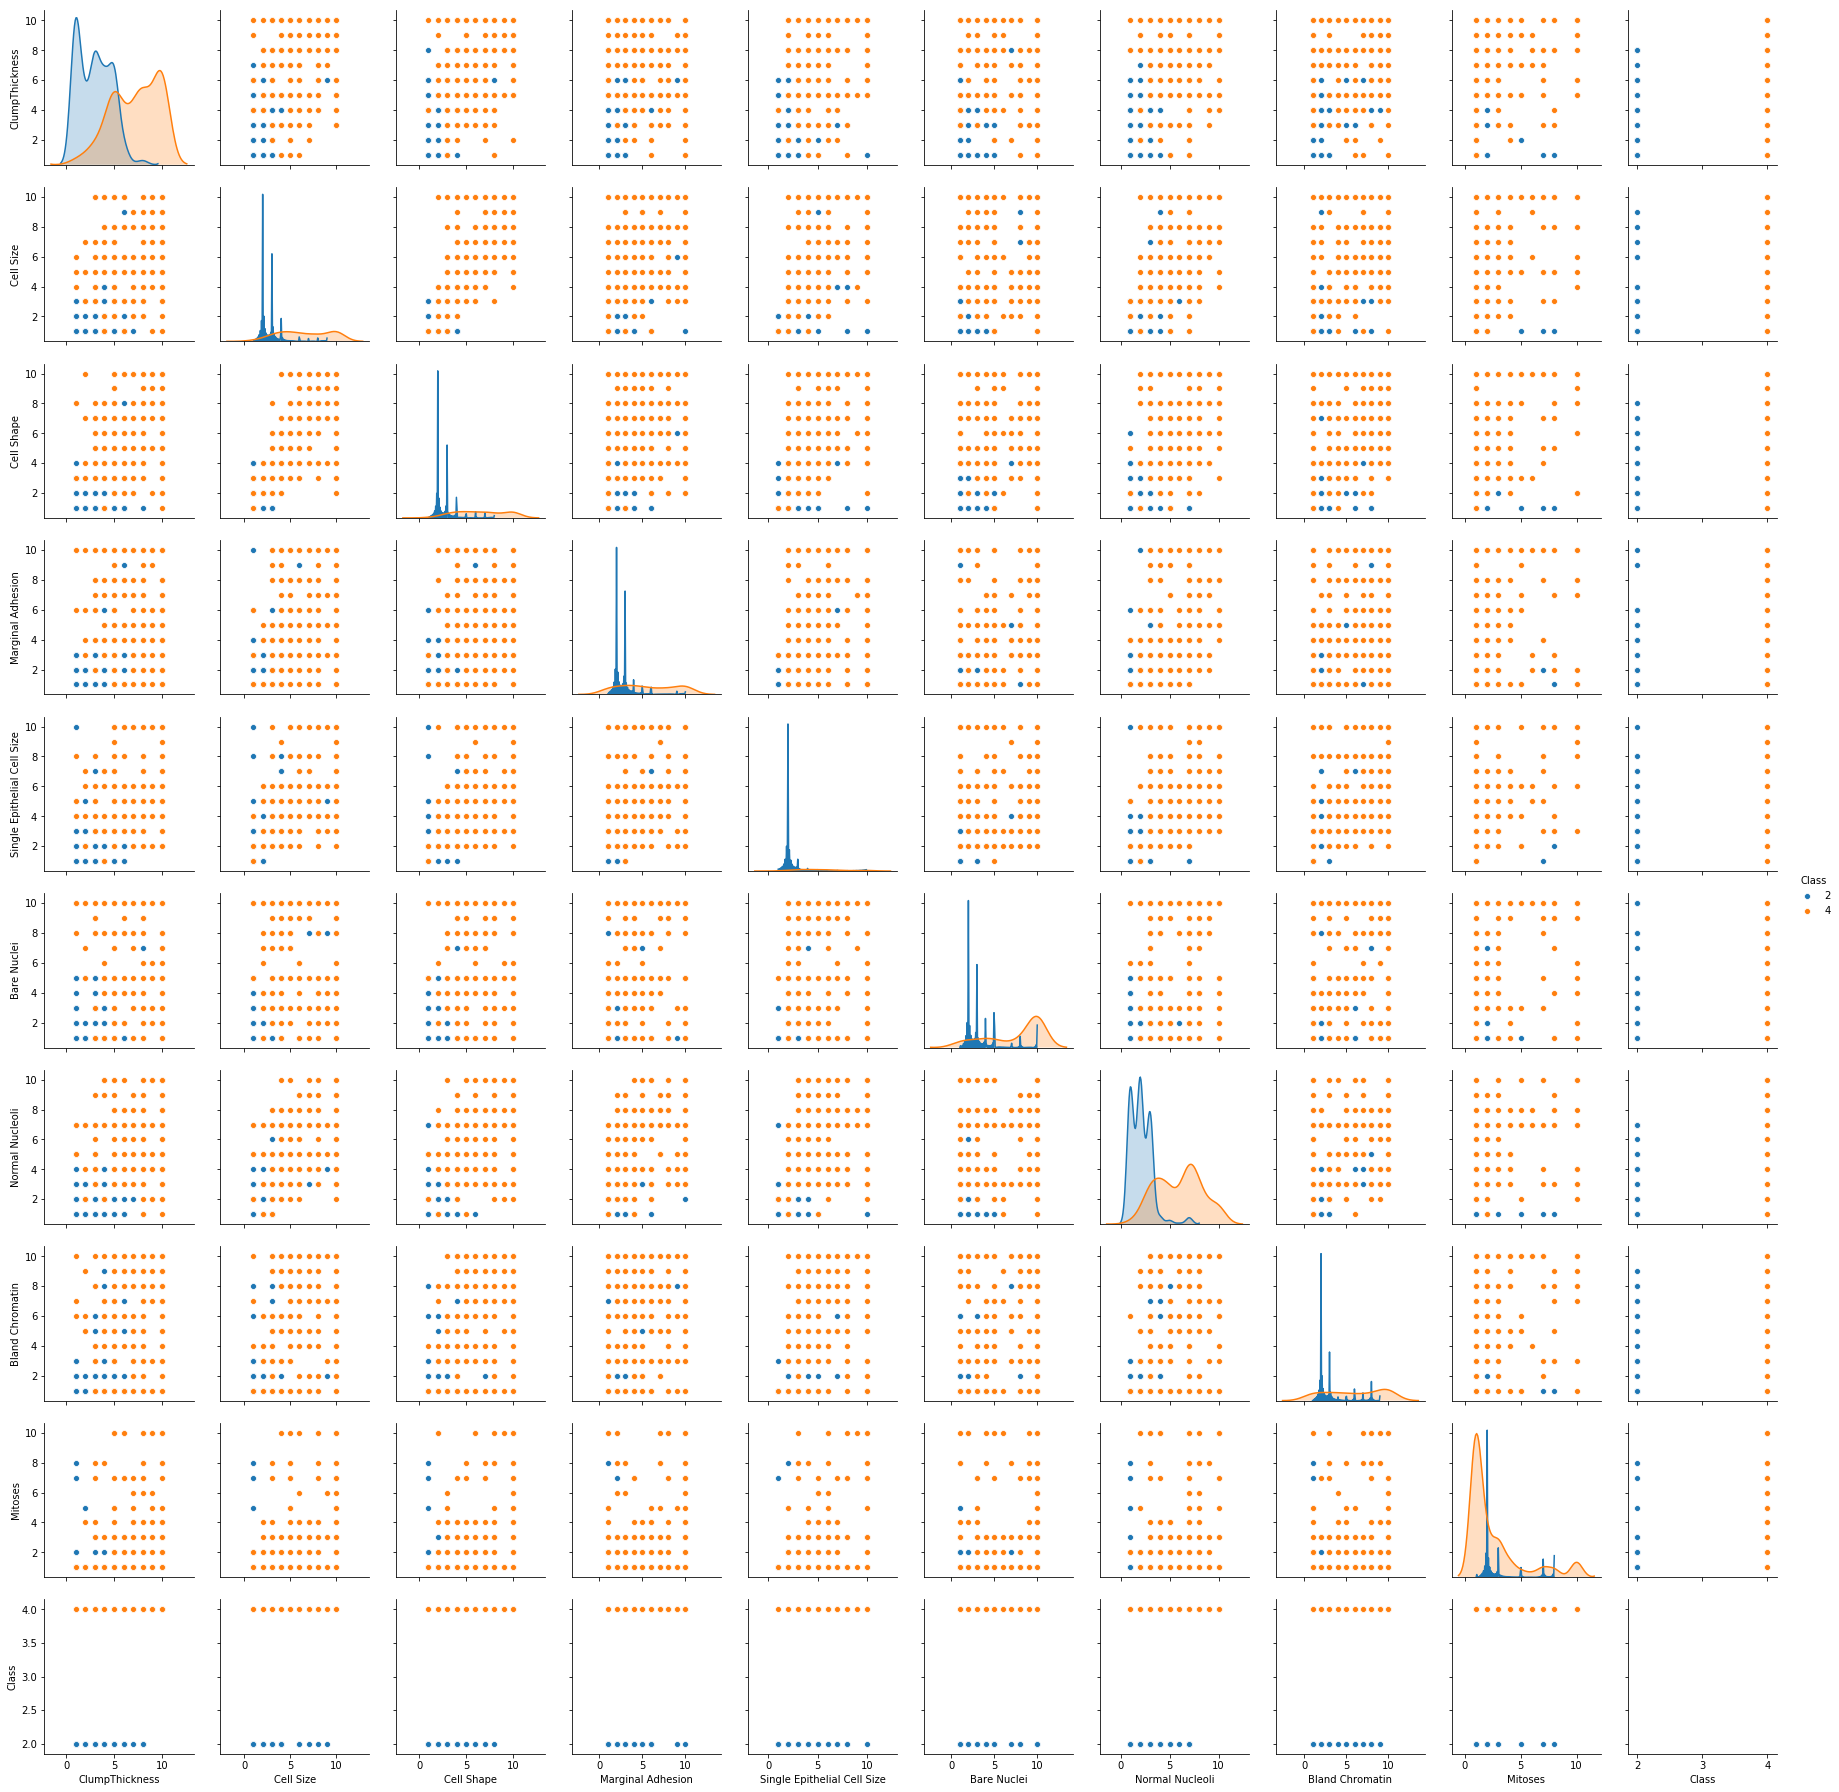

In [0]:
#Let us check for pair plots
sns.pairplot(pure_cancer_data.drop('ID', axis=1, inplace=False), hue='Class');

In [0]:
pure_cancer_data['Class'].value_counts()

2    446
4    235
Name: Class, dtype: int64

Following are the observation:
- there is little skewness with the data i.e. data for one class is more than the other
- Mitosis, Normal Nucleoli, clumpThickness can be very good feature for classification.
- Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is between 1 to 10

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

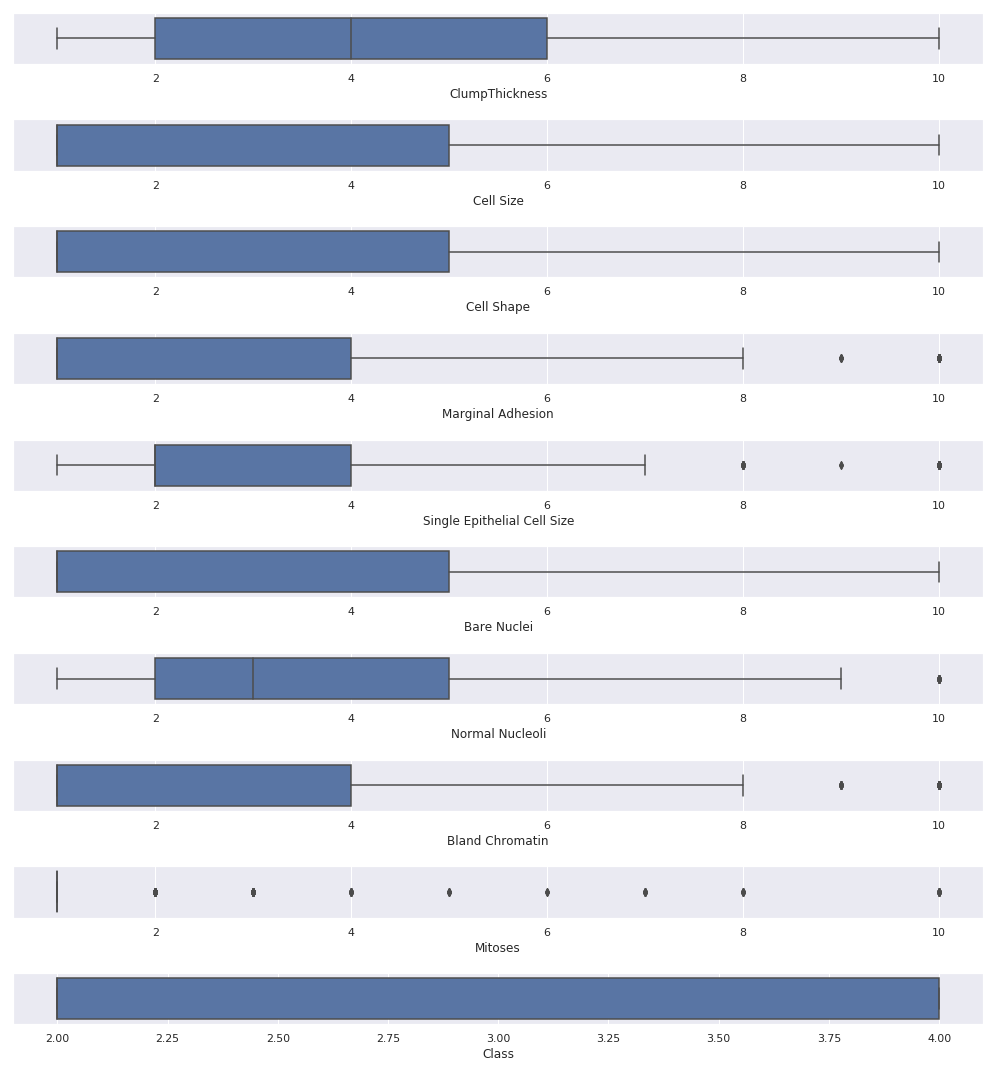

In [0]:
sns.set(rc={'figure.figsize':(14,15)})
#plt.subplots_adjust(hspace=0.6, wspace=0.4)
column_names = pure_cancer_data.drop('ID', axis=1, inplace=False).columns
num_of_col = len(column_names)
index = 1
# Checking any outliers
for col_name in column_names:
  sns.boxplot(pure_cancer_data[col_name], ax=plt.subplot(num_of_col,1,index))
  index = index + 1
plt.tight_layout()

In [0]:
# From Above we can see 5 features have outliers
# Pullling back the ouliers to IQR range (better to not lose data)

#Features and labels
X = pure_cancer_data.drop(['ID', 'Class'], axis=1, inplace=False)
#X = pure_cancer_data[['Cell Size', 'Cell Shape', 'Marginal Adhesion']]
Y = pure_cancer_data[['Class']]

In [0]:
for i in X.columns:
    up_whisk= X[i].quantile(0.75)+1.5*(X[i].quantile(0.75) - X[i].quantile(0.25))
    for j in X[i]:
        if(j > up_whisk):
            X[i]=X[i].replace(j,up_whisk)

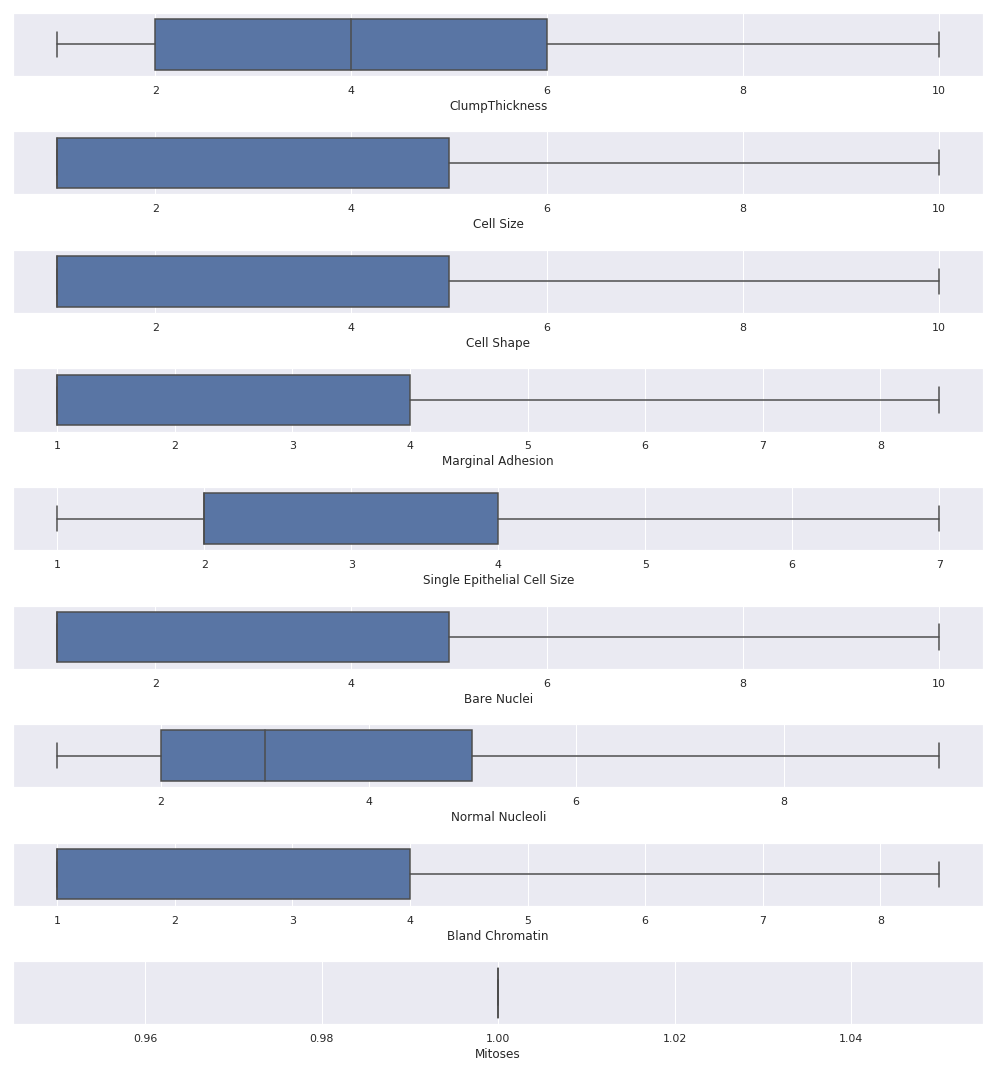

In [0]:
sns.set(rc={'figure.figsize':(14,15)})

column_names1 = X.columns
num_of_col1 = len(column_names1)
index1 = 1
# Checking any outliers
for col_name in column_names1:
  sns.boxplot(X[col_name], ax=plt.subplot(num_of_col1,1,index1))
  index1 = index1 + 1
plt.tight_layout()

In [0]:
# We could see most of the outliers are now removed.

In [0]:
from sklearn.preprocessing import StandardScaler
X_sd = StandardScaler().fit_transform(X.drop(['Mitoses','ClumpThickness'], axis=1, inplace=False))

# Q6 Create a covariance matrix for identifying Principal components

In [0]:
# PCA
# Step 1 - Create covariance matrix
# Get eigen value and eigen vector from the variance covariance matriz
cov_matrix = np.cov(X_sd.T)
print('Covariance Matrix \n')
cov_matrix

Covariance Matrix 



array([[1.00147059, 0.90508434, 0.73580339, 0.77768613, 0.68340039,
        0.76511338, 0.73525097],
       [0.90508434, 1.00147059, 0.71178412, 0.74700478, 0.70176656,
        0.74278845, 0.73287289],
       [0.73580339, 0.71178412, 1.00147059, 0.67117391, 0.69163344,
        0.68860218, 0.62446399],
       [0.77768613, 0.74700478, 0.67117391, 1.00147059, 0.62311497,
        0.66271548, 0.69279314],
       [0.68340039, 0.70176656, 0.69163344, 0.62311497, 1.00147059,
        0.67645674, 0.59926378],
       [0.76511338, 0.74278845, 0.68860218, 0.66271548, 0.67645674,
        1.00147059, 0.68021665],
       [0.73525097, 0.73287289, 0.62446399, 0.69279314, 0.59926378,
        0.68021665, 1.00147059]])

# Q7 Identify eigen values and eigen vector

In [0]:
# Step 2- Get eigen values and eigen vector

In [0]:
e_vals, e_vecs = np.linalg.eig(cov_matrix)

print('\nEigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)


Eigenvectors 
[[ 0.40501538  0.74070051 -0.1795417   0.28867335 -0.1251696   0.28308852
   0.27559251]
 [ 0.40056001 -0.6570837  -0.14941974  0.43618135 -0.05320425  0.20625902
   0.38709015]
 [ 0.3682746  -0.05362087  0.40920944  0.20958694 -0.39784056  0.15020906
  -0.68503993]
 [ 0.37270016 -0.07891159 -0.32181083 -0.60498269 -0.55754534 -0.25498317
   0.09709824]
 [ 0.35676839  0.07614317  0.65953403 -0.02900688  0.17965515 -0.5246097
   0.35156889]
 [ 0.37556629 -0.0638046   0.10748917 -0.53128528  0.5156071   0.53843067
  -0.07281961]
 [ 0.36420998  0.0251539  -0.47737289  0.18269468  0.46286208 -0.47393671
  -0.4081652 ]]

Eigenvalues 
[5.25393687 0.09175598 0.45802726 0.26194509 0.33747508 0.30871515
 0.2984387 ]


# Q8 Find variance and cumulative variance by each eigen vector

('Cumulative Variance Explained', array([ 74.94602631,  81.47966452,  86.29365763,  90.69739795,
        94.95454741,  98.69112517, 100.        ]))


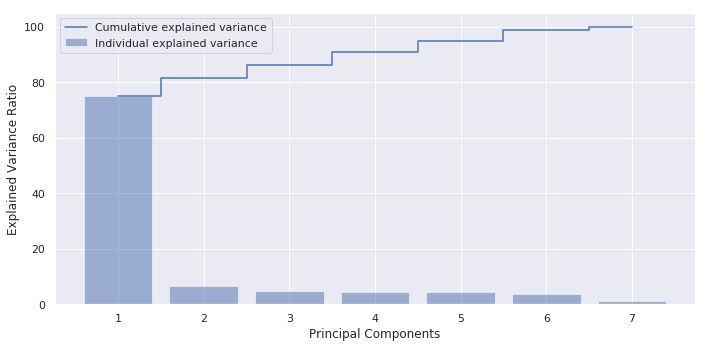

In [0]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [0]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 2 PCA dimensions (dimensionality reduction from 4 to 2)

pca = PCA(n_components=3)
data_reduced = pca.fit_transform(X_sd)
data_reduced.transpose()

array([[-1.59409629,  1.8640717 , -1.49525223, ...,  4.14107863,
         2.62925793,  3.09016471],
       [ 0.01121407, -0.85079856, -0.17151239, ...,  2.30570424,
         0.41338237,  0.0104727 ],
       [-0.21702295,  1.54383112, -0.2667971 , ..., -0.21930079,
        -1.43760256, -0.64543908]])

# Q10 Find correlation between components and features

<Figure size 2160x720 with 0 Axes>

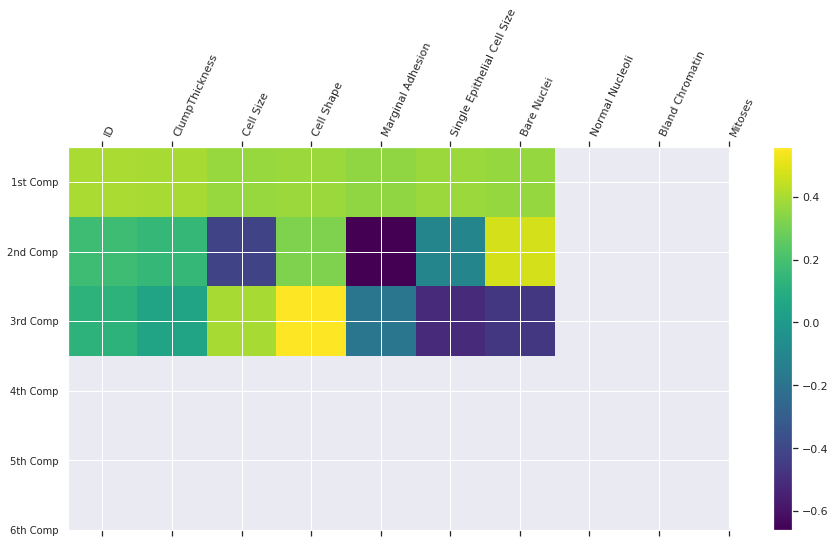

In [0]:
plt.figure(figsize=(30 , 10))
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3,4,5],['1st Comp','2nd Comp','3rd Comp', '4th Comp','5th Comp', '6th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(pure_cancer_data.drop(columns="Class").columns)),pure_cancer_data.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [0]:
jokes_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Lab/Datasets/jokes.csv')
jokes_data.shape

(24983, 101)

# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [0]:
jokes_data.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,Joke11,Joke12,Joke13,Joke14,Joke15,Joke16,Joke17,Joke18,Joke19,Joke20,Joke21,Joke22,Joke23,Joke24,Joke25,Joke26,Joke27,Joke28,Joke29,Joke30,Joke31,Joke32,Joke33,Joke34,Joke35,Joke36,Joke37,Joke38,Joke39,...,Joke61,Joke62,Joke63,Joke64,Joke65,Joke66,Joke67,Joke68,Joke69,Joke70,Joke71,Joke72,Joke73,Joke74,Joke75,Joke76,Joke77,Joke78,Joke79,Joke80,Joke81,Joke82,Joke83,Joke84,Joke85,Joke86,Joke87,Joke88,Joke89,Joke90,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.0,99.00,99.0,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.0,99.00,99.0,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.0,99.00,99.0,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.0,99.00,99.0,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [0]:
ratings_data = jokes_data.iloc[:200]
ratings_data.shape

(200, 101)

In [0]:
joke = ratings_data.iloc[:, 1:]

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,Joke11,Joke12,Joke13,Joke14,Joke15,Joke16,Joke17,Joke18,Joke19,Joke20,Joke21,Joke22,Joke23,Joke24,Joke25,Joke26,Joke27,Joke28,Joke29,Joke30,Joke31,Joke32,Joke33,Joke34,Joke35,Joke36,Joke37,Joke38,Joke39,Joke40,...,Joke61,Joke62,Joke63,Joke64,Joke65,Joke66,Joke67,Joke68,Joke69,Joke70,Joke71,Joke72,Joke73,Joke74,Joke75,Joke76,Joke77,Joke78,Joke79,Joke80,Joke81,Joke82,Joke83,Joke84,Joke85,Joke86,Joke87,Joke88,Joke89,Joke90,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-9.42,0.00,0.00,0.00,-7.72,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,0.00,8.25,0.00,0.00,7.48,7.28,7.28,8.93,0.00,6.17,7.28,0.00,0.00,8.98,7.33,0.00,6.17,9.08,7.33,...,6.46,7.28,0.00,0.00,7.04,7.28,0.00,7.28,8.25,0.00,0.00,0.00,0.00,0.00,0.00,8.93,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.03,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,0.00,0.00,0.00,0.00,2.91,3.93,6.75,6.60,0.00,6.65,-6.12,0.00,7.57,6.21,6.65,0.00,-8.30,7.18,2.82,...,0.00,-3.69,0.00,0.00,7.82,0.24,0.00,7.28,-2.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.63,0.00,0.00,-2.33,0.00,0.00,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,0.00,0.00,0.00,0.00,0.00,0.00,4.13,0.00,0.00,0.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,-6.80,-5.73,-5.00,-8.59,0.49,-8.93,-3.69,-2.18,-2.28,-6.12,-3.01,-0.58,-2.38,-7.77,-2.23,-2.28,-5.24,-5.53,-0.68,-6.94,-3.93,-0.34,-6.60,-5.49,-1.55,-0.49,-6.21,-8.06,-5.39,-7.04,...,-6.65,-2.86,-4.61,-9.42,-7.91,-9.81,-9.42,-8.98,-1.94,-6.99,-9.66,-5.19,-5.00,-4.42,-7.28,-6.50,-4.32,-6.94,-9.85,0.73,-6.21,-2.86,-7.62,-6.12,-0.29,-1.41,-3.93,-1.94,-5.68,-4.71,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,0.00,4.27,7.62,-6.26,2.96,6.07,-3.50,-2.09,6.17,5.15,4.42,5.63,2.43,0.00,0.00,4.13,7.09,7.33,7.18,0.92,0.00,5.15,5.87,0.00,0.00,7.96,3.79,0.00,1.55,0.00,3.11,...,-1.50,5.78,0.00,0.00,8.93,8.50,0.00,2.43,7.48,0.00,0.00,5.97,6.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,8.20,-7.86,-6.94,-7.96,0.29,-9.90,-7.09,-7.18,1.02,-0.29,-4.71,-7.43,1.12,-8.25,3.79,0.10,3.45,-3.45,7.57,-4.17,-0.44,9.27,5.83,-3.40,-5.44,1.60,-7.14,3.01,-6.07,5.68,...,-3.20,-6.12,-2.91,-9.22,-2.62,-7.33,-3.25,-4.22,-9.81,-2.09,-9.90,-3.79,0.49,-7.86,-9.85,1.80,-4.17,-2.38,-9.13,-8.88,3.54,-4.56,-5.44,-5.97,-9.90,-0.34,-4.13,-0.10,-0.24,-7.96,7.23,-1.12,-0.10,-5.68,-3.16,

# Q13 Change the column indices from 0 to 99

In [0]:
ratings_data.columns =  np.arange(0,101)

In [0]:
ratings_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.0,99.00,99.0,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.0,99.00,99.0,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.0,99.00,99.0,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.0,99.00,99.0,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [0]:
ratings_data.replace(99, 0, inplace=True)

/usr/local/lib/python2.7/dist-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [0]:
ratings_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,0.0,0.00,0.0,0.00,0.00,0.00,0.00,-9.42,0.00,0.00,0.00,-7.72,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,0.00,8.25,0.00,0.00,7.48,7.28,7.28,8.93,0.00,6.17,7.28,0.00,0.00,8.98,7.33,0.00,6.17,9.08,...,6.46,7.28,0.00,0.00,7.04,7.28,0.00,7.28,8.25,0.00,0.0,0.00,0.0,0.00,0.00,8.93,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.03,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,48,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,0.00,0.00,0.00,0.00,2.91,3.93,6.75,6.60,0.00,6.65,-6.12,0.00,7.57,6.21,6.65,0.00,-8.30,7.18,...,0.00,-3.69,0.00,0.00,7.82,0.24,0.00,7.28,-2.33,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.63,0.00,0.00,-2.33,0.00,0.00,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,0.0,0.00,0.0,0.00,0.00,0.00,4.13,0.00,0.00,0.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [0]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
ratings_diff = standard_scaler.fit_transform(ratings_data)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python2.7/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [0]:
ratings_diff = pd.DataFrame(ratings_diff)
ratings_diff.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,0.178514,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.240830,-1.785253,0.877475,-2.233712,-1.132409,-2.070680,-1.816124,-1.100839,1.446713,-1.083372,-0.924987,-1.485689,-1.845722,-2.122490,-1.783991,-2.453942,0.118382,-1.001283,-2.056184,-1.998067,-0.007503,1.066496,0.348160,1.210200,-1.558247,-0.106543,-1.445456,-1.979706,1.434165,0.400517,0.327022,-1.913859,-1.859857,-2.045886,...,1.360764,0.153729,-1.625066,-1.962794,0.057344,-0.790932,-2.075054,1.274203,0.641743,-1.337306,0.041833,-0.363524,-0.124389,0.133933,0.046960,-0.212373,-0.074512,-3.490156,-0.084501,-0.171033,-0.138830,-2.441033,-0.272871,-0.135909,-0.134282,-0.077980,-0.205878,-0.285698,-0.433334,0.100419,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954
1,1.371667,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.505530,-0.160595,-1.083559,2.200591,1.667223,1.195968,1.637944,1.088796,1.219007,1.186340,0.372816,1.234175,0.012507,0.626254,-0.075678,-0.347704,1.610825,1.700324,2.423967,-0.113462,1.307536,0.370800,-0.058399,-0.729363,1.781590,0.791787,-0.779575,1.570433,1.694826,-1.101271,-0.704008,1.726491,0.520218,-0.405517,...,-1.929073,-1.311459,-2.117020,1.320223,0.313423,-1.325031,2.041420,-0.249882,-0.392271,1.732496,-1.313735,0.534747,2.735533,2.679258,2.418432,1.754720,2.563571,2.840787,2.575680,2.258121,0.967082,1.384279,1.227016,1.899786,2.707365,1.353693,-0.222895,0.974583,0.936180,0.269755,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461
2,-0.968748,-0.117881,-0.121130,-0.053284,0.181880,1.672963,1.814094,1.578074,1.929134,-0.004146,-0.179172,1.320208,1.397798,2.023167,0.937724,-0.924840,-0.800160,-1.582425,1.988783,1.823995,1.948990,0.970752,-0.195157,1.679084,0.259426,-0.124483,1.289186,0.945700,1.251171,1.169453,0.162626,0.723794,0.948342,0.007672,-0.250439,1.262127,0.908504,0.139155,1.078930,1.762035,...,0.902468,0.932769,-0.088552,0.233179,0.915007,1.077335,0.022453,1.057690,1.184072,-0.139759,0.041833,-0.363524,-0.124389,0.133933,0.046960,2.616313,-0.074512,-0.248988,-0.084501,2.518811,-0.138830,-0.091677,-0.272871,-0.135909,-0.134282,-0.077980,-0.205878,-0.285698,-0.433334,2.736800,-0.192459,-0.055329,-0.362193,2.435660,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
3,-1.014639,-0.117881,1.581908,-0.053284,0.181880,0.339079,1.560803,-0.532913,1.298139,-0.004146,0.189306,1.320208,1.180095,1.445556,1.370811,-1.093038,-0.752607,0.449036,-1.192391,-0.824414,-0.249673,0.571718,-0.195157,-0.073137,0.259426,-0.124483,0.357446,0.196316,1.142891,0.694749,0.162626,0.822693,-1.875328,0.007672,1.380309,0.654835,0.742366,0.139155,-1.839687,1.348130,...,-0.487483,-1.383240,-0.088552,0.233179,1.073532,-0.444957,0.022453,1.057690,-1.048553,-0.139759,0.041833,-0.363524,-0.124389,0.133933,0.046960,-0.212373,-0.074512,-0.248988,-0.084501,-0.171033,-0.138830,-0.091677,-0.272871,-0.135909,0.065076,-0.077980,-0.205878,-1.081485,-0.433334,0.100419,-0.192459,-0.055329,-0.362193,-0.031131,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
4,0.958652,1.772484,0.819110,-0.988252,-1.216599,0.257903,0.063882,1.223570,0.968206,-0.113390,0.968316,1.517277,1.233960,-0.487364,1.174359,-0.145714,-1.349003,0.797737,-0.125893,0.473662,1.055289,1.159984,1.084081,1.689704,-0.037992,1.588193,0.149486,-0.944537,0.924289,1.071659,1.230355,1.113207,-2.581246,1.601076,0.973161,-0.162928,-0.100538,-0.142939,1.206002,0.766486,...,1.100417,0.698424,0.969487,-0.321286,0.984107,0.489177,1.671815,0.408149,0.078311,0.813796,0.041833,-0.363524,-0.124389,0.133933,0.046960,-0.212373,1.336794,-0.248988,-0.084501,-0.171033,1.335719,1.709902,-0.003819,2.305584,1.109334,-0.277970,1.941730,1.322953,0.413602,0.964615,1.582983,1.707868,0.975838,1.3133

In [0]:
ratings_diff.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
count,2.000000e+02,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,200.000000,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,...,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,200.000000,2.000000e+02,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,5.329071e-17,0.000000,1.776357e-17,-2.886580e-17,-1.332268e-17,-2.220446e-18,-6.661338e-18,6.661338e-18,1.665335e-17,-5.329071e-17,8.881784e-18,-3.552714e-17,-4.440892e-17,-8.881784e-18,3.552714e-17,-8.881784e-18,-1.199041e-16,1.998401e-17,2.553513e-17,8.881784e-18,2.664535e-17,1.110223e-16,-1.776357e-17,-2.664535e-17,4.440892e-17,-1.332268e-17,-5.329071e-17,-1.776357e-17,8.881784e-18,0.000000,0.000000,3.552714e-17,-1.065814e-16,4.440892e-18,4.440892e-18,-8.881784e-18,1.776357e-17,1.776357e-17,-2.220446e-17,-1.776357e-17,...,4.440892e-18,-2.664535e-17,1.998401e-17,4.440892e-18,7.105427e-17,-5.773160e-17,-1.332268e-17,-1.776357e-17,1.665335e-17,4.440892e-18,-2.664535e-17,1.776357e-17,-2.220446e-17,4.440892e-17,0.000000,8.881784e-18,1.776357e-17,-2.220446e-17,-2.220446e-17,-5.773160e-17,4.440892e-18,8.881784e-18,-4.440892e-18,4.440892e-17,2.442491e-17,8.881784e-18,-3.552714e-17,-1.387779e-17,2.220446e-17,-2.220446e-17,-4.440892e-17,-3.552714e-17,0.000000,-1.332268e-17,0.000000,4.440892e-18,-2.220446e-17,8.881784e-18,-1.776357e-17,5.773160e-17
std,1.002509e+00,1.002509,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509,1.002509,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,...,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509,1.002509e+00,1.002509,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.565325e+00,-2.277344,-2.150499e+00,-2.230392e+00,-2.350430e+00,-1.802882e+00,-2.548886e+00,-1.803067e+00,-2.013555e+00,-2.449717e+00,-2.133708e+00,-2.257039e+00,-2.502898e+00,-1.604833e+00,-2.573857e+00,-1.618900e+00,-1.396556e+00,-2.030112e+00,-1.864039e+00,-2.122490e+00,-1.803763e+00,-2.513592e+00,-2.264512e+00,-2.186422e+00,-2.056184e+00,-2.264778e+00,-2.264476e+00,-2.897409e+00,-2.268938e+00,-2.597619,-2.141908,-2.587251e+00,-2.581246e+00,-2.159183e+00,-2.309879e+00,-2.857377e+00,-3.183856e+00,-2.088489e+00,-2.162409e+00,-2.320370e+00,...,-2.565955e+00,-2.675307e+00,-2.236077e+00,-2.174366e+00,-2.499387e+00,-2.618114e+00,

In [0]:
ratings_data.T.mean().sort_values()[:10]

5     -3.859109
182   -3.738713
58    -3.728119
72    -2.563762
165   -2.199604
152   -1.938812
181   -1.880099
0     -1.781782
194   -1.777228
124   -1.610792
dtype: float64